In [3]:
import pandas as pd

df = pd.read_csv(r'C:\Users\HONOR\Desktop\t-edu\test.csv')
df.head()

,Unnamed: 0,year,rooms,area,current_floor,total_floors,price,subway,remote_minutes
0,0,2025,2,40.5,6,27,28826623,Павелецкая,4.0
1,2,2025,3,83.7,3,9,17000000,Нижегородская,11.0
2,3,2025,3,174.4,3,7,734724000,Кузнецкий мост,3.0
3,4,2025,2,68.0,2,8,54900000,Красные ворота,7.0
4,5,2025,2,55.5,10,12,11700000,NaN,NaN


In [4]:
from sklearn.model_selection import train_test_split

x = df[['rooms', 'area', 'total_floors']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set size:", len(x_train))
print("Test set size:", len(x_test))

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(f"Среднеквадратическая ошибка: {mse}")

coefs = model.coef_
intercept = model.intercept_

for feature, coef in zip (x.columns, coefs):
    print(f"Коэффициент для {feature}: {coef.round(2)}")

print(f"Свободный член: {intercept}")

Training set size: 645
Test set size: 162
Среднеквадратическая ошибка: 9920377037871386.0
Коэффициент для rooms: -36224745.39
Коэффициент для area: 2005820.27
Коэффициент для total_floors: -1193358.16
Свободный член: 21781316.149484053


<Axes: xlabel='area', ylabel='price'>

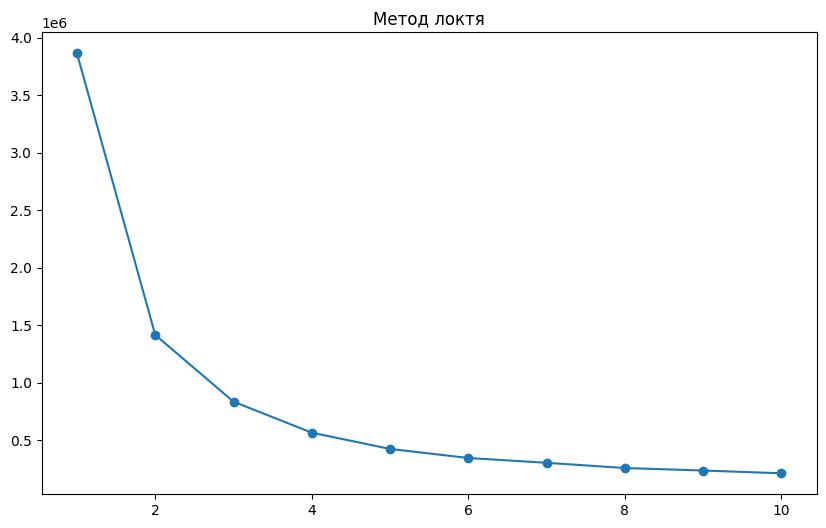

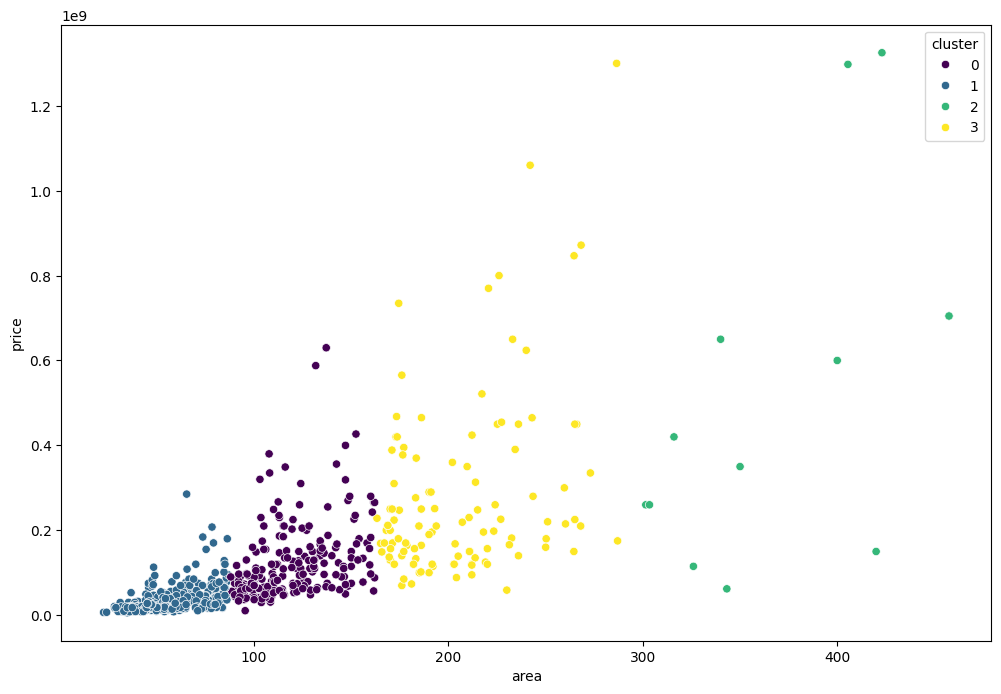

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

x = df[['rooms', 'area', 'total_floors']]

inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя')



kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(x)

import seaborn as sns

plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x=df['area'], y=df['price'], hue=df['cluster'], palette='viridis')

# 0 - низкий класс
# 1 - средний класс
# 2 - высокий класс
# 3 - элитный класс

In [9]:
def cate(cluster_value):
    if cluster_value == 0:
        return 'средний класс'
    elif cluster_value == 2:
        return 'элитный класс'
    elif cluster_value == 1:
        return 'низкий класс'
    elif cluster_value == 3:
        return 'высокий класс'

# Теперь применяем функцию к столбцу
df['Категория'] = df['cluster'].apply(cate)

# Выводим первые 5 строк
df.head()


,Unnamed: 0,year,rooms,area,current_floor,total_floors,price,subway,remote_minutes,cluster,Категория
0,0,2025,2,40.5,6,27,28826623,Павелецкая,4.0,1,низкий класс
1,2,2025,3,83.7,3,9,17000000,Нижегородская,11.0,1,низкий класс
2,3,2025,3,174.4,3,7,734724000,Кузнецкий мост,3.0,3,высокий класс
3,4,2025,2,68.0,2,8,54900000,Красные ворота,7.0,1,низкий класс
4,5,2025,2,55.5,10,12,11700000,NaN,NaN,1,низкий класс


In [10]:
df.to_csv('estate.csv')